In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [43]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [44]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14314,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

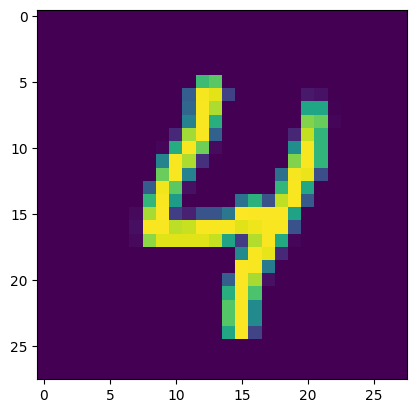

In [7]:
plt.imshow(df.iloc[14314,1:].values.reshape(28,28))

In [45]:
X=df.iloc[:,1:]
y=df.iloc[:,0:]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier()

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
import numpy as np
from IPython.display import Audio, display
import time

# Define the audio data (a simple sine wave tone)
# This creates a short, high-frequency beep
SAMPLING_RATE = 44100
duration = 0.5  # seconds
frequency = 880 # Hz (A5 note)
t = np.linspace(0., duration, int(SAMPLING_RATE*duration))
audio_data = 0.5 * np.sin(2.*np.pi*frequency*t)


start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

display(Audio(audio_data, rate=SAMPLING_RATE, autoplay=True))



273.59513330459595


In [27]:
import numpy as np

print("y_test shape:", np.shape(y_test))
print("y_pred shape:", np.shape(y_pred))
print("y_test dtype:", getattr(y_test, "dtype", None))
print("y_pred dtype:", getattr(y_pred, "dtype", None))

# show a few rows
print("y_test sample rows:\n", np.array(y_test)[:5])
print("y_pred sample rows:\n", np.array(y_pred)[:5])

# show uniques per column if 2D
if np.ndim(y_test) == 2:
    for i in range(min(5, y_test.shape[1])):
        print(f"unique values in y_test col[{i}]:", np.unique(y_test[:, i]))


y_test shape: (8400, 785)
y_pred shape: (8400, 785)
y_test dtype: None
y_pred dtype: int64
y_test sample rows:
 [[8 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]
y_pred sample rows:
 [[8 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


InvalidIndexError: (slice(None, None, None), 0)

In [28]:
# 1) convert to numpy (safe) and inspect
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)
print("shapes:", y_test.shape, y_pred.shape)

# 2) extract labels assuming label is stored in the first column
y_test_labels = y_test[:, 0].astype(int)   # first column = true label
y_pred_labels = y_pred[:, 0].astype(int)   # first column = predicted label

print("unique test labels:", np.unique(y_test_labels))
print("unique pred labels:", np.unique(y_pred_labels))
print("example labels (first 10):", y_test_labels[:10], y_pred_labels[:10])

# 3) compute accuracy and more metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", acc)

print("\nClassification report:")
print(classification_report(y_test_labels, y_pred_labels))

print("\nConfusion matrix (shape):", confusion_matrix(y_test_labels, y_pred_labels).shape)


shapes: (8400, 785) (8400, 785)
unique test labels: [0 1 2 3 4 5 6 7 8 9]
unique pred labels: [0 1 2 3 4 5 6 7 8 9]
example labels (first 10): [8 1 9 9 8 6 2 2 7 1] [8 1 9 9 8 6 2 2 7 1]
Accuracy: 0.9648809523809524

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400




In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [50]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [52]:
X_train_trf.shape

(33600, 100)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier()

In [55]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [56]:
y_pred=knn.predict(X_test_trf)

In [58]:
# 1) convert to numpy (safe) and inspect
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)
print("shapes:", y_test.shape, y_pred.shape)

# 2) extract labels assuming label is stored in the first column
y_test_labels = y_test[:, 0].astype(int)   # first column = true label
y_pred_labels = y_pred[:, 0].astype(int)   # first column = predicted label

print("unique test labels:", np.unique(y_test_labels))
print("unique pred labels:", np.unique(y_pred_labels))
print("example labels (first 10):", y_test_labels[:10], y_pred_labels[:10])

# 3) compute accuracy and more metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", acc)

print("\nClassification report:")
print(classification_report(y_test_labels, y_pred_labels))

print("\nConfusion matrix (shape):", confusion_matrix(y_test_labels, y_pred_labels).shape)


shapes: (8400, 785) (8400, 785)
unique test labels: [0 1 2 3 4 5 6 7 8 9]
unique pred labels: [0 1 2 3 4 5 6 7 8 9]
example labels (first 10): [8 1 9 9 8 6 2 2 7 1] [8 1 9 7 8 6 2 2 7 1]
Accuracy: 0.9535714285714286

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       816
           1       0.96      0.99      0.98       909
           2       0.97      0.94      0.96       846
           3       0.95      0.94      0.94       937
           4       0.96      0.95      0.96       839
           5       0.94      0.94      0.94       702
           6       0.96      0.98      0.97       785
           7       0.96      0.94      0.95       893
           8       0.95      0.93      0.94       835
           9       0.93      0.93      0.93       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400




In [68]:
# transforming to a 2d coordinate system
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [69]:
X_train_trf

array([[-2.71857717, -0.4898516 ],
       [-0.67702402, -6.75351528],
       [-3.03320897,  6.50972281],
       ...,
       [ 2.14885102,  0.78095147],
       [ 1.059639  ,  0.94760905],
       [17.70268504,  1.96172859]])

In [70]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

ValueError: 2